# Snake

In [20]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from agent import *
tf.random.set_seed(0)
random.seed(0)
import math
np.random.seed(0)
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Environment definition - dim 7x7

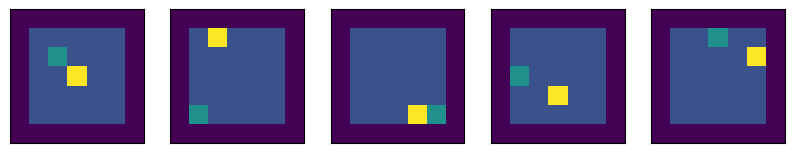

In [21]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Model

## Training

In [16]:
reward_history_agent=[0]
EPOCHS=1000
env_ = get_env()
agent=PPO(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history_agent)

# 4.25 min

agent.save(path=os.getcwd())


0/1000 - 0
50/1000 - 0
100/1000 - -0.00011333331349305809
150/1000 - 9.999944268201943e-06
200/1000 - 0.0007066666730679572
250/1000 - 0.0008766665705479681
300/1000 - 0.00013333330571185797
350/1000 - 0.0015333332121372223
400/1000 - 0.0012133332202211022
450/1000 - 0.001853333436883986
500/1000 - 0.0022533335722982883
550/1000 - 0.002246666932478547
600/1000 - 0.001146666589193046
650/1000 - 0.002176666399464011


KeyboardInterrupt: 

2024-08-25 13:41:56.197566: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0/1000 - 0
50/1000 - 0
100/1000 - 0.014283334836363792
150/1000 - 0.04060332849621773
200/1000 - 0.06620333343744278
250/1000 - 0.06896333396434784
300/1000 - 0.07385333627462387
350/1000 - 0.07614333182573318
400/1000 - 0.07452666759490967
450/1000 - 0.07326667010784149
500/1000 - 0.07713665813207626
550/1000 - 0.07987333089113235
600/1000 - 0.08177332580089569
650/1000 - 0.07756666094064713
700/1000 - 0.08190666884183884
750/1000 - 0.0851166620850563
800/1000 - 0.08205999433994293
850/1000 - 0.08506999164819717
900/1000 - 0.08337999135255814
950/1000 - 0.08316000550985336


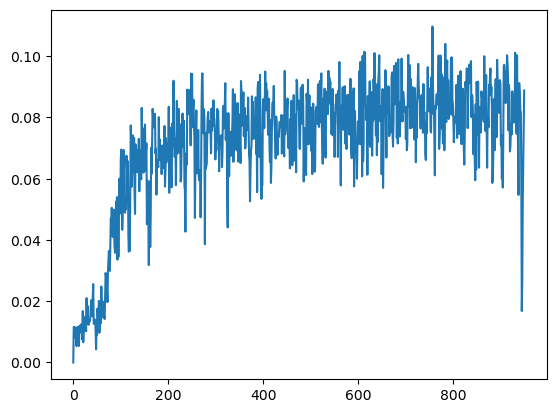

In [4]:
reward_history_conv=[0]
EPOCHS=1000
env_ = get_env()
agent=PPO_conv(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history_conv)

agent.save(os.getcwd())
# 7 45 min

In [13]:
reward_history_dqn=[0]
EPOCHS=1000
env_ = get_env()
agent=DQN(env=env_)
for e in range(EPOCHS):
        if e%50==0:
            print(f"{e}/{EPOCHS} - {np.mean(reward_history_dqn[-30:]) or 0}", end="\n")
        
        #if e%400==0 and e!=0:
        #    step=step+1        

        state=env_.to_state()
        state=tf.reshape(state, (1000, -1))

        value_q=agent.Q_net(state)
        #original_probs = agent.Q_net(state)
        #pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
        #samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
        samples=tf.argmax(value_q, axis=1)
        actions=tf.reshape(samples, (samples.shape[0],1))

        masks=env_.check_actions(actions)

        rewards= env_.move(actions)
        new_state = tf.constant(env_.to_state())
        new_state=tf.reshape(new_state, (1000, -1))

        agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
        if e > 50: reward_history_dqn.append(np.mean(rewards))
plt.plot(reward_history_dqn)


0/1000 - 0
50/1000 - 0
100/1000 - -0.0011166667100042105
150/1000 - -0.0004566667485050857
200/1000 - -0.007173334714025259
250/1000 - 0.0003433330566622317
300/1000 - 0.002056666649878025
350/1000 - -0.0018866671016439795
400/1000 - -0.00043333342182449996
450/1000 - -0.0009133333223871887
500/1000 - -0.0014933336060494184
550/1000 - 0.0019233333878219128
600/1000 - -0.0019333336967974901
650/1000 - -0.002429999876767397
700/1000 - -0.007686668541282415
750/1000 - -0.00907333567738533


KeyboardInterrupt: 

In [22]:
reward_history_dqn=[0]
EPOCHS=1000
env_ = get_env()
agent=DQN_conv(env=env_)
for e in range(EPOCHS):
        if e%50==0:
            print(f"{e}/{EPOCHS} - {np.mean(reward_history_dqn[-30:]) or 0}", end="\n")
        
        state=env_.to_state()
        #state=tf.reshape(state, (1000, -1))

        value_q=agent.Q_net(state)
        samples=tf.argmax(value_q, axis=1)
        actions=tf.reshape(samples, (samples.shape[0],1))

        masks=env_.check_actions(actions)

        rewards= env_.move(actions)
        new_state = tf.constant(env_.to_state())
        #new_state=tf.reshape(new_state, (1000, -1))

        agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
        if e > 50: reward_history_dqn.append(np.mean(rewards))
plt.plot(reward_history_dqn)


0/1000 - 0
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/marco/miniconda3/envs/python1/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_28304/1843799168.py", line 22, in <module>
    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marco/Documents/snake/snake_RF/agent.py", line 251, in learn
    y_hat=(tf.reshape(tf.boolean_mask(self.Q_net(tf.gather(states, indexes)), actions_index), (256,1)))
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/marco/miniconda3/envs/python1/lib/python3.11/site-packages/tensorflow/python/util/traceback_utils.py", line 153, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/home/marco/miniconda3/envs/python1/lib/python3.11/site-packages/ten

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [6]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:01<00:00, 543.65it/s]


In [22]:
def rebuild_action(list_of_position):
    action=[]
    list_of_position=np.array(list_of_position)
    for index in range(len(list_of_position)-1):
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,1])):
            action.append(1)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([1,0])):
            action.append(0)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,-1])):
            action.append(3)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([-1,0])):
            action.append(2)
    return action


def rebuild_action_path(prioirty_stack, last_postion, lista: list):
    if prioirty_stack[tuple(last_postion)]==None:
        return lista
    else:
        prev=prioirty_stack[tuple(last_postion)]
        lista.append(prev)
        return rebuild_action_path(prioirty_stack, prev, lista)

def compute_neighbours(pos):
    pos_return_0 = np.copy(pos)
    pos_return_1 = np.copy(pos)
    pos_return_2 = np.copy(pos)
    pos_return_3 = np.copy(pos)

    pos_return_0[0] = pos_return_0[0]+1 # move at right
    pos_return_1[1] = pos_return_1[1]+1 # move up
    pos_return_2[0] = pos_return_2[0]-1 # move at left
    pos_return_3[1] = pos_return_3[1]-1 # move down

    return [pos_return_0, pos_return_1, pos_return_2, pos_return_3]

def BFS_search(state):
    visited={}
    selected_path={}
    heads = np.argwhere((state[:,:,3]) == 1)[0] # position of the head
    fruit = np.argwhere((state[:,:,1]) == 1)[0] # position of the fruit
    boundary = np.array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [1, 0],
       [1, 6],
       [2, 0],
       [2, 6],
       [3, 0],
       [3, 6],
       [4, 0],
       [4, 6],
       [5, 0],
       [5, 6],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6, 6]])
    
    q=[heads]

    for a in range(7):
        for b in range(7):
            visited[(a,b)]=False

    visited[tuple(heads)]=True

    selected_path[tuple(heads)]=None


    while len(q)!=0:
        node = q.pop(0)
        new_pos=compute_neighbours(node)

        for pos in new_pos:
            if tuple(pos)==tuple(fruit):
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]
                return pos, selected_path
            
            if not (np.any(np.all(boundary == pos, axis=1))) and visited[tuple(pos)]==False:
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]=True
                q.append(pos)

reward_BFS = []
env_ = get_env()
for e in trange(1500):
        if e%50==0:
            print(f"{e}- {np.mean(reward_BFS[-30:]) or 0}", end="\n")
        action_list_all_state={}
        state=env_.to_state()
        for i in range(state.shape[0]):
                try:
                    p,sl=BFS_search(state[i,:,:])
                    actions=rebuild_action_path(sl, p, [])
                    actions.insert(0, tuple(p))
                    action_list=rebuild_action(actions)
                    action_list.reverse()
                    action_list_all_state[i]=action_list
                except TypeError:
                    # in this case the models can't solve the problem
                    action_list_all_state[i]=[4]

        #tf.reshape(tf.convert_to_tensor(action_list_all_state), (3341,1))

        action=[]
        for chiave in action_list_all_state.keys():
            try:
                action.append(action_list_all_state[chiave][0])
            except TypeError:
                action.append(action_list_all_state[chiave])
        
        reward=env_.move(tf.reshape(tf.convert_to_tensor(action), (1000,1)))
        reward_BFS.append(np.mean(reward))
        


  0%|          | 0/1500 [00:00<?, ?it/s]

0- nan


  3%|▎         | 50/1500 [00:16<07:53,  3.06it/s]

50- 0.12229333072900772


  7%|▋         | 100/1500 [00:33<07:34,  3.08it/s]

100- 0.12215998768806458


 10%|█         | 150/1500 [00:49<07:32,  2.98it/s]

150- 0.12264666706323624


 13%|█▎        | 200/1500 [01:06<07:09,  3.03it/s]

200- 0.12368998676538467


 17%|█▋        | 250/1500 [01:23<07:18,  2.85it/s]

250- 0.12384333461523056


 20%|██        | 300/1500 [01:40<06:50,  2.93it/s]

300- 0.12366333603858948


 23%|██▎       | 350/1500 [01:57<06:37,  2.90it/s]

350- 0.12163999676704407


 27%|██▋       | 400/1500 [02:14<06:18,  2.91it/s]

400- 0.1231900006532669


 30%|███       | 450/1500 [02:31<06:03,  2.89it/s]

450- 0.1227533146739006


 33%|███▎      | 500/1500 [02:48<05:37,  2.97it/s]

500- 0.12105333060026169


 37%|███▋      | 550/1500 [03:05<05:15,  3.01it/s]

550- 0.12315332144498825


 40%|████      | 600/1500 [03:22<04:58,  3.02it/s]

600- 0.12175333499908447


 43%|████▎     | 650/1500 [03:39<04:44,  2.99it/s]

650- 0.12124335020780563


 47%|████▋     | 700/1500 [03:56<04:31,  2.95it/s]

700- 0.12255332618951797


 50%|█████     | 750/1500 [04:14<04:16,  2.92it/s]

750- 0.12284000962972641


 53%|█████▎    | 800/1500 [04:31<03:54,  2.98it/s]

800- 0.12247666716575623


 57%|█████▋    | 850/1500 [04:48<03:43,  2.91it/s]

850- 0.12099333852529526


 60%|██████    | 900/1500 [05:05<03:24,  2.94it/s]

900- 0.12221666425466537


 63%|██████▎   | 950/1500 [05:21<03:08,  2.92it/s]

950- 0.12439333647489548


 67%|██████▋   | 1000/1500 [05:38<02:47,  2.98it/s]

1000- 0.1229933351278305


 70%|███████   | 1050/1500 [05:55<02:30,  2.99it/s]

1050- 0.12257333844900131


 73%|███████▎  | 1100/1500 [06:12<02:18,  2.89it/s]

1100- 0.12317666411399841


 74%|███████▍  | 1112/1500 [06:17<02:11,  2.95it/s]


KeyboardInterrupt: 

In [15]:
np.mean(rewards)

-0.022

ValueError: x and y can be no greater than 2D, but have shapes (1500,) and (1500, 1000, 1)

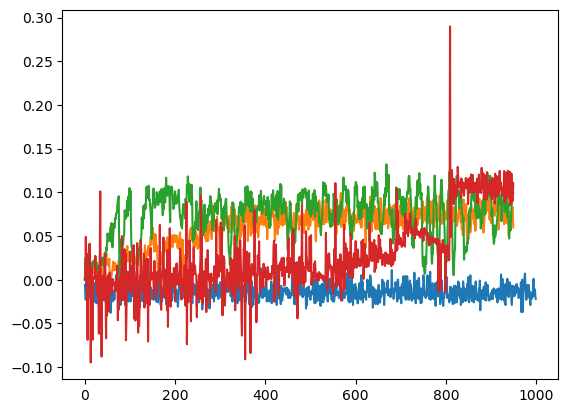

In [9]:
plt.plot(random_rewards)
plt.plot(reward_history_agent)
plt.plot(reward_history_conv)
plt.plot(reward_history_dqn)
plt.plot(reward_BFS)

In [ ]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 10
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

In [ ]:
reward_history_agent=[0]
EPOCHS=1000
env_ = get_env()
agent=PPO(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history_agent)

# 4.25 min


In [ ]:
reward_history_conv=[0]
EPOCHS=1000
env_ = get_env()
agent=PPO_conv(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history_conv)

# 7 45 min

In [ ]:
reward_history_dqn=[0]
EPOCHS=1000
env_ = get_env()
agent=DQN(env=env_)
for e in range(EPOCHS):
        if e%50==0:
            print(f"{e}/{EPOCHS} - {np.mean(reward_history_dqn[-30:]) or 0}", end="\n")
        
        #if e%400==0 and e!=0:
        #    step=step+1        

        state=env_.to_state()
        state=tf.reshape(state, (1000, -1))

        value_q=agent.Q_net(state)
        #original_probs = agent.Q_net(state)
        #pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
        #samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
        samples=tf.argmax(value_q, axis=1)
        actions=tf.reshape(samples, (samples.shape[0],1))

        masks=env_.check_actions(actions)

        rewards= env_.move(actions)
        new_state = tf.constant(env_.to_state())
        new_state=tf.reshape(new_state, (1000, -1))

        agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
        if e > 50: reward_history_dqn.append(np.mean(rewards))
plt.plot(reward_history_dqn)


In [ ]:
reward_history_dqn=[0]
EPOCHS=1000
env_ = get_env()
agent=DQN_conv(env=env_)
for e in range(EPOCHS):
        if e%50==0:
            print(f"{e}/{EPOCHS} - {np.mean(reward_history_dqn[-30:]) or 0}", end="\n")
        
        state=env_.to_state()
        #state=tf.reshape(state, (1000, -1))

        value_q=agent.Q_net(state)
        samples=tf.argmax(value_q, axis=1)
        actions=tf.reshape(samples, (samples.shape[0],1))

        masks=env_.check_actions(actions)

        rewards= env_.move(actions)
        new_state = tf.constant(env_.to_state())
        #new_state=tf.reshape(new_state, (1000, -1))

        agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
        if e > 50: reward_history_dqn.append(np.mean(rewards))
plt.plot(reward_history_dqn)


In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

In [ ]:
def rebuild_action(list_of_position):
    action=[]
    list_of_position=np.array(list_of_position)
    for index in range(len(list_of_position)-1):
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,1])):
            action.append(1)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([1,0])):
            action.append(0)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,-1])):
            action.append(3)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([-1,0])):
            action.append(2)
    return action


def rebuild_action_path(prioirty_stack, last_postion, lista: list):
    if prioirty_stack[tuple(last_postion)]==None:
        return lista
    else:
        prev=prioirty_stack[tuple(last_postion)]
        lista.append(prev)
        return rebuild_action_path(prioirty_stack, prev, lista)

def compute_neighbours(pos):
    pos_return_0 = np.copy(pos)
    pos_return_1 = np.copy(pos)
    pos_return_2 = np.copy(pos)
    pos_return_3 = np.copy(pos)

    pos_return_0[0] = pos_return_0[0]+1 # move at right
    pos_return_1[1] = pos_return_1[1]+1 # move up
    pos_return_2[0] = pos_return_2[0]-1 # move at left
    pos_return_3[1] = pos_return_3[1]-1 # move down

    return [pos_return_0, pos_return_1, pos_return_2, pos_return_3]

def BFS_search(state):
    visited={}
    selected_path={}
    heads = np.argwhere((state[:,:,3]) == 1)[0] # position of the head
    fruit = np.argwhere((state[:,:,1]) == 1)[0] # position of the fruit
    boundary = np.array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 8],
       [0, 9],
       [1, 0],
       [1, 9],
       [2, 0],
       [2, 9],
       [3, 0],
       [3, 9],
       [4, 0],
       [4, 9],
       [5, 0],
       [5, 9],
       [6, 0],
       [6, 9],
       [7, 0],
       [7, 9],
       [8, 0],
       [8, 9],
       [9, 0],
       [9, 9],
       [9, 0],
       [9, 1],
       [9, 2],
       [9, 3],
       [9, 4],
       [9, 5],
       [9, 6],
       [9, 7],
       [9, 8],
       [9, 9]
       ])
    
    q=[heads]

    for a in range(7):
        for b in range(7):
            visited[(a,b)]=False

    visited[tuple(heads)]=True

    selected_path[tuple(heads)]=None


    while len(q)!=0:
        node = q.pop(0)
        new_pos=compute_neighbours(node)

        for pos in new_pos:
            if tuple(pos)==tuple(fruit):
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]
                return pos, selected_path
            
            if not (np.any(np.all(boundary == pos, axis=1))) and visited[tuple(pos)]==False:
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]=True
                q.append(pos)

reward_BFS = []
env_ = get_env()
for e in trange(1500):
        if e%50==0:
            print(f"{e}- {np.mean(reward_BFS[-30:]) or 0}", end="\n")
        action_list_all_state={}
        state=env_.to_state()
        for i in range(state.shape[0]):
                try:
                    p,sl=BFS_search(state[i,:,:])
                    actions=rebuild_action_path(sl, p, [])
                    actions.insert(0, tuple(p))
                    action_list=rebuild_action(actions)
                    action_list.reverse()
                    action_list_all_state[i]=action_list
                except TypeError:
                    # in this case the models can't solve the problem
                    action_list_all_state[i]=[4]

        #tf.reshape(tf.convert_to_tensor(action_list_all_state), (3341,1))

        action=[]
        for chiave in action_list_all_state.keys():
            try:
                action.append(action_list_all_state[chiave][0])
            except TypeError:
                action.append(action_list_all_state[chiave])
        
        reward=env_.move(tf.reshape(tf.convert_to_tensor(action), (1000,1)))
        reward_BFS.append(np.mean(reward))
        
